<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C4/02_Visualizaciones_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 3: Introducción a GGplot2

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Ggplot es una librería basada en la gramática de gráficos, creadapor Wilkinson (2015). Básicamente la gramática de gráficos nos dice que un gráfico estadístico corresponde a un mapeo entre la data hacia atributos estéticos (como el color, forma o tamaño) de objetos geométricos (como puntos, líneas o barras).

## Referencias útiles

 * https://ggplot2.tidyverse.org/reference/index.html
 * https://r4ds.had.co.nz/data-visualisation.html
 * https://www.rdocumentation.org/packages/ggplot2/versions/3.3.0


## Cheatsheets
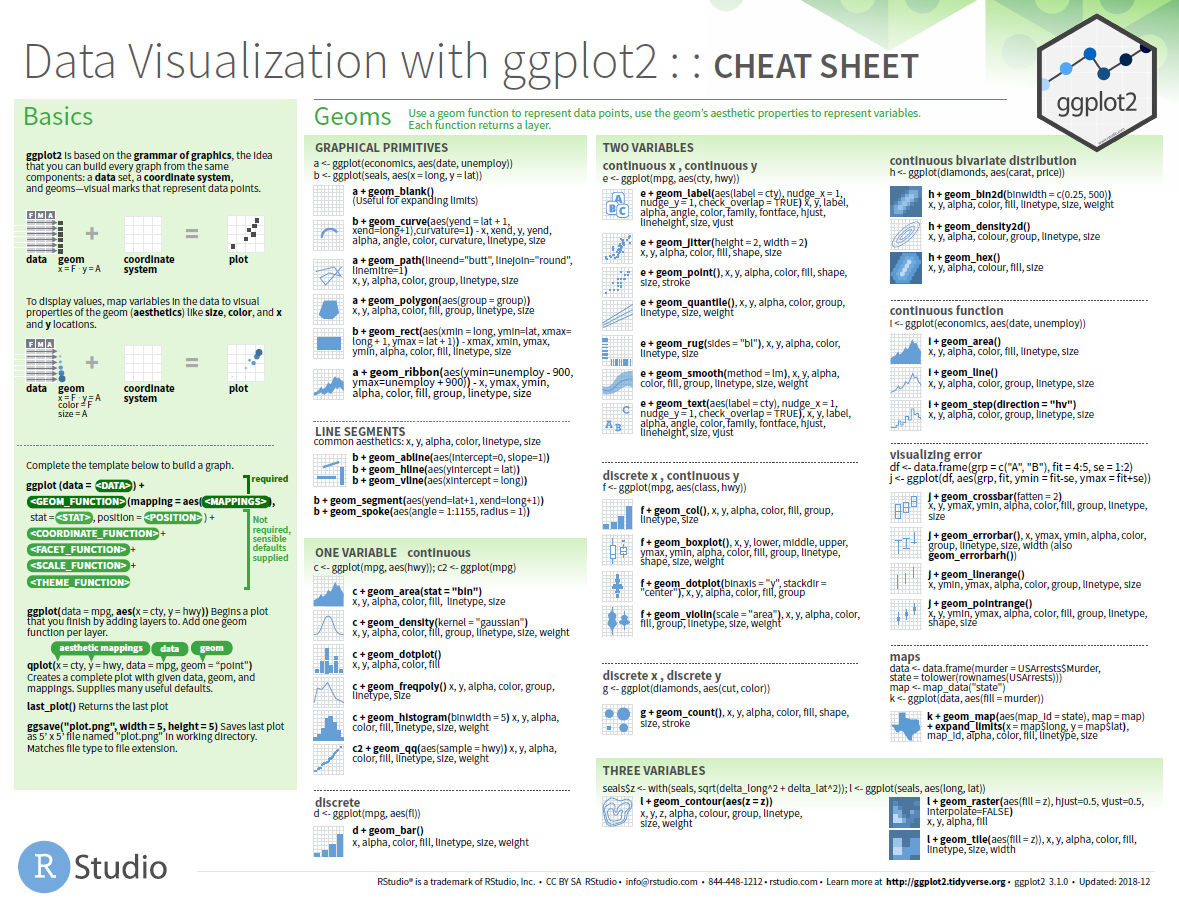


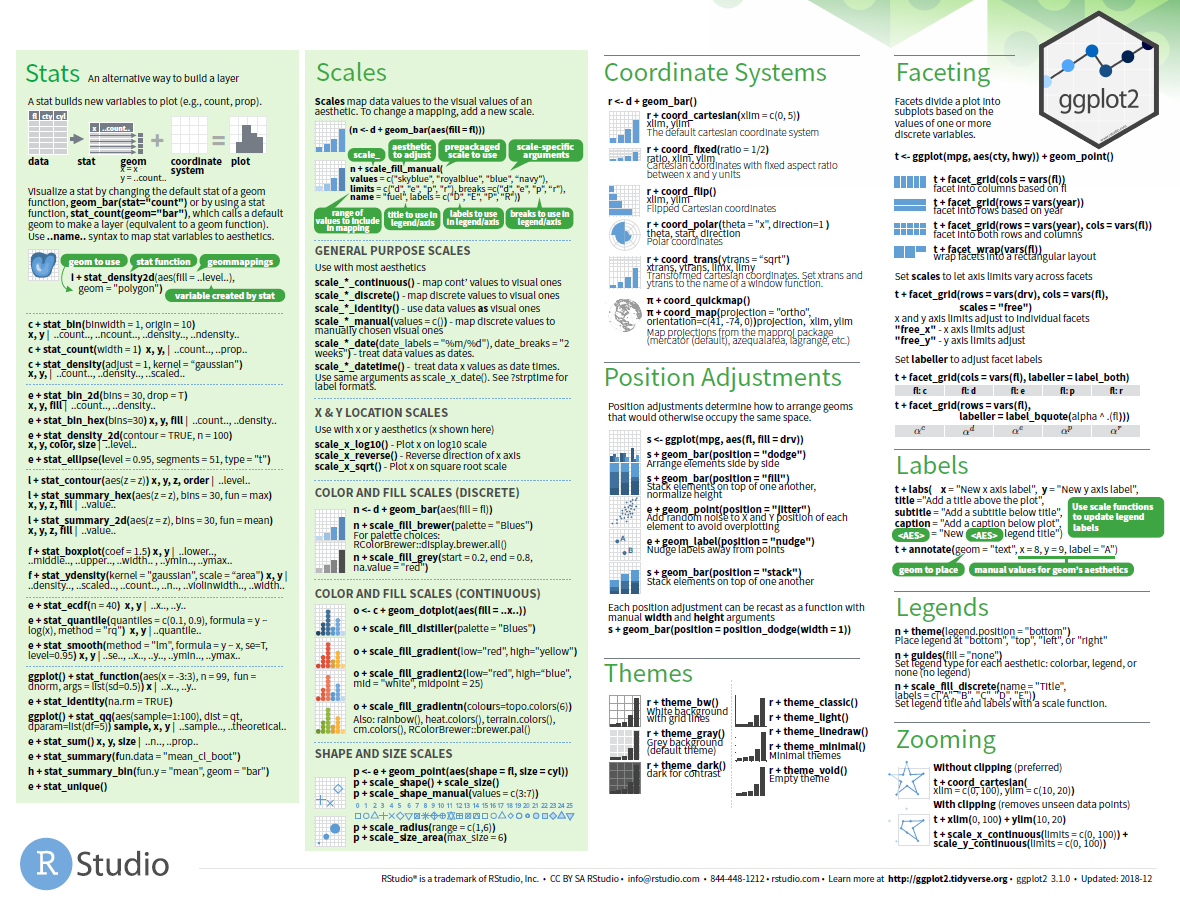


In [ ]:
# Cargamos la librería
library(ggplot2) # install.packages("ggplot2")
# Otras librerías que pueden ser de interés: leaflet, iplots, highcharter * ,ggmap, visNetwork**

Para entender el funcionamiento de esta grámatica comencemos con un ejemplo analizando la data mpg:

In [ ]:
# "+" es mas o menos lo mismo en ggplot que %>% de dplyr
data(mpg)
mpg

In [ ]:
plot(mpg$displ, mpg$hwy,col = "blue")

In [ ]:
library(dplyr)

In [ ]:
mpg %>% ggplot() + # Indicamos el origen de los datos que buscamos visualizar
    aes(x = displ, y = hwy) + # capa "estética" : aesthetical mapping (indicamos qué variables queremos visualizar)
    geom_point() # capa geométrica, se indica "cómo" queremos visualizar las variables indicadas en el aesthetical mapping

In [ ]:
# tambien podemos generar el gráfico de la siguiente manera (aes( coo parametro mapping))
ggplot(mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point()

# I. Color, tamaño, forma y otros atributos estéticos

## I.1. Color
El color está dado por la variable categórica class (notar que es lo mismo si incluimos el parámetro color, colour o col. ggplot automáticamente entiende lo que queremos :) )

In [ ]:
## Color por "class" dentro de aes


In [ ]:
#y si queremos color azul?



In [ ]:
# Que pasa si queremos colorear en negro solo los de class "2seater"



In [ ]:
# que sucede si el color no es una variable discreta (categórica)



In [ ]:
# Modificar la escala de colores y dar la impresión de "intensidad"


## I.2. Forma

In [ ]:
## Forma (shape) según "drv"


In [ ]:
# El parámetro alpha permite regular la intensidad el color en función de la densidad de los puntos.


## I.3. Forma y color

In [ ]:
## Forma y color (color = class, shape = drv)


## I.4. Tamaño

In [ ]:
## Tamaño (size) según "cyl"


In [ ]:
# size = drv? nota: no tiene sentido dar el tamaño segú nuna variable categórica (R internamente la ordena alfabéticamente y luego asigna el valor del tamañao)


# II. Facetas

En inglés Facetting, es una manera de dividir la data disponible según variables categóricas y mostrar el mismo gráfico por cada categoría en una misma imagen.

In [ ]:
# Apertura por drv


Grafique otras relaciones entre la eficiencia (hwy o cty), tamaño del motor (displ) por cada  número de cilindros (cyl). ¿Qué se observa?

In [ ]:
# Por ejemplo, x=displ,y=hwy , aperturado por número de cilindros


# III. Capas geométricas: prefijo geom_

Hasta aquí hemos utilizado sólo una de las diversas maneras de mostrar (geométricamente hablando) la relación entre las variables hasta aquí descritas.
En ggplot existe una gran variedad de funciones "geom_", sólo veremos algunas de ellas, aunque en la documentación oficial se describen todas las opciones disponibles https://ggplot2.tidyverse.org/index.html

## III.1 geom_point()

La fución geom_point() se encarga de visualizar las variables definidas en aes() como un gráfico de dispersión.

## III.2 geom_smooth()
Con esta función podemos añadir una curva de tendencia a nuestros datos


In [ ]:
#geom_smooth()




¿Cómo podemos graficar las curvas de tendencia para cada tipo de tracción (drv)?

In [ ]:
# por color


In [ ]:
# y usando facet_wrap


## III.3 geom_boxplot() y geom_jitter()
 Podemos variar la forma del gráfico modificando la capa geométrica con las funciones geom_
 Por ejemplo, hace un rato visualizamos la relación entre hwy y drv. Para este tipo de relaciones es más informativo un gráfico de cajas.

## III.4 geom_histogram() y  geom_freqpoly()

Con estas funciones es posible graficar histogramas y la frecuencia absoluta a través de una curva poligonal

In [ ]:
## histograma . Parámetro bins =30 en geom_histogram()



In [ ]:
# Con base


In [ ]:
# podemos aperturar por drv (en color  y fill)


#usando facet_wrap



In [ ]:
## polígono de frecuencias # geom_freqpoly



## III.4 geom_line()

Podemos generar gráficos de linea, por ejemplo de series temporales.










In [ ]:
library(dplyr)
library(httr)
library(jsonlite)
library(ggplot2)

url_base <-"https://mindicador.cl"

consulta <- GET(url_base,path = "/api/dolar/2020")
consulta

text <- content(consulta, as = "text")
content <- fromJSON(text)
content$serie

# IV. Otros parámetros visuales
## IV.1 Etiquetas
Con la capa llamada `labs()`, podemos modificar los nombres de los ejes, títulos, subtítulos y leyenda.
## IV.2 Ejes y escala
Existen diversas funciones que nos peritirán modificar parámetros visuales de los ejes, en función del tipo de dato que estos representen. Algunos de los más usuales son los siguientes
 * `scale_x_date()`, `scale_y_date()`
 * `scale_x_continuous()`, `scale_y_continuous()`
 * `scale_x_discrete()`, `scale_y_discrete()`
 * `scale_x_log10()`, `scale_y_log10()`

En la documentación pueden buscar las demmás opcione mediante el prefijo _scale_



In [ ]:
## Ejemplo, consideramos incluir etiquetas y cortes en el eje de tiempo


# Guardar un gráfico en el directorio local
Podemos guardar nuestros gráficos en un  directorio local con funciones propias de ggplot2.
```
ggsave(
  filename,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
  create.dir = FALSE,
  ...
)
```